(ch06)=
# Tensors

A tensor is a physical entity that can be transformed from one coordinate system to another, changing its components in a predictable way, but without changing its fundamental nature, such that the tensor is independent of the coordinate system. Thus, scalars (e.g. mass, temperature and density), and vectors (e.g. velocity, force and lines) are tensors. More specifically, scalars are zero order and vectors are first order tensors. In this chapter, we will look at second order tensors which are commonly referred to as *tensors*. This is a short chapter but is fundamental to understand important concepts such as the Mohr circle, the orientation tensor, and the mathematical background for important tensors in geology such as stress and strain.

(ch06-1)=
## Basic characteristics of a tensor

In three dimensions, a *tensor* is characterized by nine components:

$$
\mathbf{T}=T_{ij}=\begin{bmatrix}T_{11}&T_{12}&T_{13}\\T_{21}&T_{22}&T_{23}\\T_{31}&T_{32}&T_{33}\end{bmatrix}
$$ (ch06_eq01)

Notice that tensors are represented by capital bold letters, and we use brackets to differentiate them from matrices such as the transformation matrix **a** in [Chapter 5](ch05). The nine components of the tensor $T_{ij}$ give the values of the tensor with reference to the three axes of the specific coordinate system $\mathbf{X_1X_2X_3}$. If we change the axes orientations, then the nine components will change but, similar to a vector, the tensor itself will not change.

Like matrices, tensors can be symmetric, asymmetric, or antisymmetric. If the nine components $T_{ij}$ have different values, the tensor is asymmetric. If $T_{ij}=T_{ji}$, the tensor is symmetric. In this case the components above the principal diagonal are the same as those below the diagonal, and only six components are required to define the tensor. Finally, if $T_{ij}=-T_{ji}$, the tensor is antisymmetric. In this case the components along the diagonal are zero, and only three components are required to define the tensor.

Any asymmetric tensor **T** can be decomposed into a symmetric tensor **S** plus an antisymmetric tensor **A**:

$$
T_{ij}=S_{ij}+A_{ij}\quad where\quad S_{ij}=\frac{T_{ij}+T_{ji}}{2}\quad and\quad A_{ij}=\frac{T_{ij}-T_{ji}}{2}
$$ (ch06_eq02)

We will use this property when dealing with infinitesimal strain ([Chapter 8](ch08)).

For all symmetric tensors, there is one orientation of the coordinate axes for which all the components except those along the principal diagonal, are zero:

$$
\mathbf{T}=T_{ij}=\begin{bmatrix}T_{11}&0&0\\0&T_{22}&0\\0&0&T_{33}\end{bmatrix}=\begin{bmatrix}T_2&0&0\\0&T_1&0\\0&0&T_3\end{bmatrix}
$$ (ch06_eq03)

Under this condition, the values along the diagonal are the principal axes of the tensor. Based on their magnitude, these axes are ranked as the maximum ($T_1$), intermediate ($T_2$), and minimum ($T_3$) principal axes. Notice that the indices of the principal axes do not have to coincide with the indices of the coordinate system, for example in Eq. {eq}`ch06_eq03` $T_1$ is parallel to the coordinate axis $\mathbf{X_2}$. The principal axes define the major, intermediate and minor axes of a three-dimensional surface known as the magnitude ellipsoid ({numref}`Figure %s <ch06_fig01>`). You have probably heard about this ellipsoid before in relation to stress or strain.

```{figure} /figures/ch06_fig01.png
:width: 400px
:name: ch06_fig01

The magnitude ellipsoid and principal axes of a symmetric tensor $\textbf{T}$ for the case described by Eq. {eq}`ch06_eq03`. Notice that $T_1$, $T_2$ and $T_3$ define the major, intermediate and minor axes of the ellipsoid. Modified from Allmendinger et al. (2012).
```

(ch06-2)=
## Principal axes of a tensor

Determining the orientation of the coordinate system whose axes are parallel to the principal axes of a symmetric tensor involves solving the *eigenvalue* problem (Allmendinger et al., 2012). The mathematical solution to this problem gives a cubic polynomial:

$$
\lambda^3-I\lambda^2-II\lambda-III=0
$$ (ch06_eq04)

The three roots of $\lambda$ are the three eigenvalues and they correspond to the magnitudes of the three principal axes. Once we know the eigenvalues, we can calculate the eigenvectors, which give the orientation of the three principal axes. Thus, we can find the principal axes of any symmetric tensor by finding its eigenvectors and eigenvalues. In Python, the NumPy `linalg.eigh` function computes the eigenvalues and eigenvectors of a symmetric array. We will use this function later in the chapter when finding the principal axes of a tensor.

:::{note}
`linalg.eigh` also sorts the eigenvalues in ascending order.
:::

The three coefficients $I$, $II$ and $III$ in Eq. {eq}`ch06_eq04` are known as the invariants of the tensor. They have the same values regardless of the coordinate system we choose. As we will see later (e.g. stress invariants in [Chapter 7](ch07)), these invariants are very important. Their values are given by:

$$
\begin{gathered}
    I=T_{11}+T_{22}+T_{33}=T_1+T_2+T_3 \\
    II=\frac{(T_{ij}T_{ij}-I^2)}{2}=-(T_1T_2+T_2T_3+T_3T_1) \\
    III=\det\mathbf{T}=\vert T_{ij}\vert = T_1T_2T_3 
\end{gathered}
$$ (ch06_eq05)

(ch06-3)=
## Tensors as vector operators

A tensor commonly relates two vectors, or more formally we can say that a tensor is a linear vector operator because the components of the tensor are the coefficients of a set of linear equations that relate two vectors:

$$
\mathbf{u}=\mathbf{T}\mathbf{v}\quad or\quad u_i=T_{ij}v_j
$$ (ch06_eq06)

A nice example of this relation is Cauchy’s law ([Chapter 7](ch07)), which says that the traction on a plane (a vector) is equal to the stress (a tensor) times the pole to the plane (another vector). Since in three dimensions the indices $i$ and $j$ change from 1 to 3, Eq. {eq}`ch06_eq06` corresponds to three equations, one for each of the components of **u** in terms of the components of **v**. In Python this looks like:

```python
# v (1 x 3 vector) and T (3 x 3 tensor) are declared before
u = np.zeros(3) # initialize u (1 x 3 vector)
for i in range(3): # free index
    for j in range(3): # dummy index
        u[i] = T[i,j]*v[j] + u[i]
```

An implication of Eq. {eq}`ch06_eq06` is that one can produce a tensor from a type of product of two vectors. This operation is known as the dyad product and it involves multiplying a column vector times a row vector, which gives a 3 x 3 matrix:

$$
\mathbf{T}=\mathbf{u}\otimes\mathbf{v}\quad or\quad T_{ij}=u_iv_j
$$ (ch06_eq07)

This gives nine equations (one for each component of the tensor) in terms of the components of **u** and **v**. In Python this looks like:

```python
# u (1 x 3 vector) and v (1 x 3 vector) are declared before
T = np.zeros((3,3)) # initialize T (3 x 3 tensor)
for i in range(3): # free index
    for j in range(3): # free index
        T[i,j] = u[i]*v[j]
```

In [Section 6.5](ch06-5), we will use the dyad product to derive the orientation tensor.

(ch06-4)=
## Tensor transformations

If we know the components of a tensor in one coordinate system, we can determine what the components are in any other coordinate system, just as we did with vectors in [Section 5.1.2](ch05-1-2). All we need to know is the transformation matrix **a**. The procedure, however, is more difficult because a second order tensor is more complicated than a vector. The new components of the tensor in terms of the old are given by (Allmendinger et al., 2012):

$$
\mathbf{T'}=\mathbf{a}^{\mathbf{T}}\mathbf{T}\mathbf{a}\quad or\quad T'_{ij}=a_{ik}a_{jl}T_{kl}
$$ (ch06_eq08)

This equation represent nine equations (since there are two fixed indices $i$ and $j$) with nine terms each (since there are two dummy indices $k$ and $l$). It is tedious to expand and solve Eq. {eq}`ch06_eq08` by hand. Fortunately, we can solve this equation in Python using loops:

```python
# T_old (3 x 3 tensor) and a (3 x 3 transf. matrix) 
# are declared before
T_new = np.zeros((3,3)) # initialize T_new (3 x 3 tensor)
for i in range(3): # free index
    for j in range(3): # free index
        for k in range(3): # dummy index
            for l in range(3): # dummy index
                T_new[i,j] = a[i,k]*a[j,l]*T_old[k,l] \
                    + T_new[i,j]
```

Likewise, we can compute the old coordinates of a tensor in terms of the new coordinates:

$$
\mathbf{T}=\mathbf{a}\mathbf{T'}\mathbf{a}^{\mathbf{T}}\quad or\quad T_{ij}=a_{ki}a_{lj}T'_{kl}
$$ (ch06_eq09)

In Python this looks like:

```python
# T_new (3 x 3 tensor) and a (3 x 3 transf. matrix) 
# are declared before
T_old = np.zeros((3,3)) # initialize T_old (3 x 3 tensor)
for i in range(3): # free index
    for j in range(3): # free index
        for k in range(3): # dummy index
            for l in range(3): # dummy index
                T_old[i,j] = a[k,i]*a[l,j]*T_new[k,l] \
                    + T_old[i,j]
```

(ch06-4-1)=
### The Mohr circle

Let’s consider the case where the axes of the old coordinate system are parallel to the principal axes of the tensor **T**. Now, let’s change the coordinate system to a different orientation by rotating it an angle $\theta$ about one of the principal axes, for example the intermediate axis $T_2$ ({numref}`Figure %s <ch06_fig02>`). The transformation matrix **a** for this problem is:

```{figure} /figures/ch06_fig02.png
:width: 350px
:name: ch06_fig02

Rotation of principal coordinate system $\textbf{X_{1}X_{2}X_{3}}$ about the principal axis $T_2$ an amount $\theta$. Modified from Allmendinger (2020a).
```

$$
\mathbf{a}=\begin{pmatrix}\cos\theta&\cos90&\cos(90-\theta)\\\cos90&\cos0&\cos90\\\cos(90+\theta)&\cos90&\cos\theta\end{pmatrix}=\begin{pmatrix}\cos\theta&0&\sin\theta\\0&1&0\\-\sin\theta&0&\cos\theta\end{pmatrix}
$$ (ch06_eq10)

The tensor **T** in the old coordinate system is:

$$
\mathbf{T}=T_{ij}=\begin{bmatrix}T_1&0&0\\0&T_2&0\\0&0&T_3\end{bmatrix}
$$ (ch06_eq11)

Now, we can use Eq. {eq}`ch06_eq08` to calculate the components of the tensor in the new coordinate system. Substituting Eqs. {eq}`ch06_eq10` and {eq}`ch06_eq11` into Eq. {eq}`ch06_eq08` and carrying out the summation, we obtain:

$$
\mathbf{T'}=T'_{ij}=\begin{bmatrix}T_1\cos^2\theta+T_3\sin^2\theta&0&-(T_1-T_3)\sin\theta\cos\theta\\0&T_2&0\\-(T_1-T_3)\sin\theta\cos\theta&0&T_1\sin^2\theta+T_3\cos^2\theta\end{bmatrix}
$$ (ch06_eq12)

The components of $\mathbf{T'}$ can be expressed in a nicer way using the following trigonometric identities for double angles:

$$
\sin 2\theta=2\sin\theta\cos\theta,\quad \sin^2\theta=\frac{1-\cos 2\theta}{2},\quad \cos^2\theta=\frac{1+\cos 2\theta}{2}
$$ (ch06_eq13)

Substituting these equations into Eq. {eq}`ch06_eq12` and rearranging, we get the following equations for the components of the tensor in the new coordinate system:

$$
\begin{gathered}
    T_{11}'=\frac{T_1+T_3}{2}+\frac{T_1-T_3}{2}\cos 2\theta  \\
    T_{33}'=\frac{T_1+T_3}{2}-\frac{T_1-T_3}{2}\cos 2\theta \\
    T_{13}'=T_{31}'=-\frac{T_1-T_3}{2}\sin 2\theta
\end{gathered}
$$ (ch06_eq14)

If you recall, the equation of a circle of center $(c,0)$ and radius $r$ is:

$$
\begin{gathered}
    x=c-r\cos\alpha \\
    y=r\sin\alpha
\end{gathered}
$$ (ch06_eq15)

We can see that these equations are similar to Eq. {eq}`ch06_eq14`. In fact, Eq. {eq}`ch06_eq14` describes a circle with center $c$ and radius $r$ ({numref}`Figure %s <ch06_fig03>`):

$$
c = \left(\frac{T_1+T_3}{2},0\right)\qquad r = \left(\frac{T_1-T_3}{2}\right)
$$ (ch06_eq16)

```{figure} /figures/ch06_fig03.png
:width: 450px
:name: ch06_fig03

The Mohr circle is the graphical representation of the rotation of a symmetric tensor about one of its principal axes. Modified from Allmendinger et al. (2012).
```

This circle is known as the *Mohr circle*, because it was devised by the German engineer Otto Mohr in the late 1800s. The Mohr circle is basically a graphical device to rotate a symmetric tensor about one of its principal axes. It is commonly associated with stress, but it can be applied to any symmetric tensor (strain and permeability for example). We will see the application of the Mohr circle in [Chapter 7](ch07) and [Chapter 8](ch08).

(ch06-5)=
## The orientation tensor

The concepts discussed so far in this chapter are the mathematical basis for the following two chapters on stress and strain. We will now focus on a relatively simple yet important problem that relies on the concept of eigenvalues and eigenvectors: How do we find the best-fit fold axis to a group of bedding poles? And similarly, how do we find the best-fit plane to a group of lines?

(ch06-5-1)=
### Best-fit fold axis

The solution to this problem is based on the least squares method (Charlesworth et al., 1976; Allmendinger et al., 2012). Suppose we are trying to calculate the axis $\mathbf{f}$ of a fold. If the fold is truly cylindrical, then all the bedding poles $\mathbf{p}_{[n]}$ should be perpendicular to $\mathbf{f}$, i.e. the angle $\theta_i$ between any pole $\mathbf{p}_{[i]}$ and $\mathbf{f}$ should be 90, and $\cos\theta_i$ should be zero ({numref}`Figure %s <ch06_fig04>`). $\cos\theta_i$ is equal to the dot product between $\mathbf{f}$ and $\mathbf{p}_{[i]}$. Treating these lines as row vectors, the dot product can be written as:

```{figure} /figures/ch06_fig04.png
:width: 400px
:name: ch06_fig04

Best-fit fold axis to a group of bedding poles. A perfectly oriented pole $\textbf{p}_{[i]}$ should be perpendicular to the fold axis $\textbf{f}$, and $\theta{_i}$ should be 90$^o$ ($cos \theta_{i} = 0$). Modified from Allmendinger (2020a).
```

$$
\cos\theta_i=\mathbf{p}_{[i]}\mathbf{f^T}
$$ (ch06_eq17)

We can use the value of $\cos\theta_i$ to represent the deviation of a pole $\mathbf{p}_{[i]}$ from $\mathbf{f}$. The sum of the squares of the deviations of all the poles is:

$$
S=\sum_{i=1}^{n}\cos^2\theta_i=\sum_{i=1}^{n}\left(\mathbf{p}_{[i]}\mathbf{f^T}\right)^2
$$ (ch06_eq18)

Since the dot product is commutative ($\mathbf{p}_{[i]}\mathbf{f^T}=\mathbf{f}\mathbf{p}_{[i]}^{\mathbf{T}}$), we can write Eq. {eq}`ch06_eq18` as:

$$
S=\sum_{i=1}^{n}\mathbf{f}\mathbf{p}_{[i]}^{\mathbf{T}}\mathbf{p}_{[i]}\mathbf{f^T}=\mathbf{f}\mathbf{T}\mathbf{f^T}
$$ (ch06_eq19)

**T** is a symmetric tensor known as the *orientation tensor* and is composed of the sum of the dyad products of each pole $\mathbf{p}_{[i]}$ ($[\cos\alpha_i\,\cos\beta_i\,\cos\gamma_i]$) with itself (Eq. {eq}`ch06_eq20`):

$$
\begin{aligned}
\mathbf{T} &=\sum_{i=1}^{n} \mathbf{p}_{[i]}^{\mathbf{T}}\mathbf{p}_{[i]}=\sum_{i=1}^{n}\left(p_{i}p_{j}\right)_{[i]} \\ 
    &=\left[\begin{array}{ccc}\sum \cos ^{2} \alpha_{[i]} & \sum \cos \alpha_{[i]} \cos \beta_{[i]} & \sum \cos \alpha_{[i]} \cos \gamma_{[i]} \\ \sum \cos \beta_{[i]} \cos \alpha_{[i]} & \sum \cos ^{2} \beta_{[i]} & \sum \cos \beta_{[i]} \cos \gamma_{[i]} \\ \sum \cos \gamma_{[i]} \cos \alpha_{[i]} & \sum \cos \gamma_{[i]} \cos \beta_{[i]} & \left.\sum \cos ^{2} \gamma_{[i]}\right]\end{array}\right]
\end{aligned}
$$ (ch06_eq20)

You can think of $\mathbf{T}$ as describing an ellipsoid in three-dimensions. To find the principal axes of this ellipsoid, we need to calculate the eigenvalues and eigenvectors of $\mathbf{T}$. The smallest eigenvalue of $\mathbf{T}$ is the minimization of the deviations $S$ in Eq. {eq}`ch06_eq19`. If the fold were perfectly cylindrical, the lowest eigenvalue would be zero. Thus, the eigenvector corresponding to the lowest eigenvalue is the best-fit fold axis $\mathbf{f}$.

The function [bingham](https://github.com/nfcd/compGeo/blob/master/source/functions/bingham.py) computes and plots a cylindrical best-fit to a distribution of bedding poles. It returns the eigenvalues and eigenvectors of $\mathbf{T}$, the uncertainty cones for the Bingham statistics, and the best-fit plane to the bedding poles. For more information on the Bingham statistics, please check Fisher et al. (1987):

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from compgeo.sph_to_cart import sph_to_cart
from compgeo.cart_to_sph import cart_to_sph
from compgeo.zero_twopi import zero_twopi
from compgeo.stereonet import stereonet
from compgeo.great_circle import great_circle
from compgeo.st_coord_line import st_coord_line


def bingham(T,P,stype):
    """
    bingham calculates and plots a cylindrical best fit to
    a distribution of poles to bedding. The statistical
    routine is based on algorithms in Fisher et al. (1988)
    
    USE: eigvec, confcone, bestfit, fig, ax = bingham(T,P)
        
    T and P = Vectors of lines trends and plunges
            respectively
    stype = Stereonet type: 0 = equal angle, 1 = equal area
        
    eigvec = 3 x 3 matrix with eigenvalues (column 1), trends
    (column 2) and plunges (column 3) of the eigenvectors.
    Maximum eigenvalue and corresponding eigenvector are
    in row 1, intermediate in row 2, and minimum in row 3.
    
    confcone = 2 x 2 matrix with the maximum (column 1) and
    minimum (column 2) radius of the 95% elliptical
    confidence cone around the eigenvector corresponding
    to the largest (row 1), and lowest (row 2) eigenvalue
    
    besFit = 1 x 2 vector containing the strike and dip
    (right hand rule) of the best fit great circle to
    the distribution of lines
    
    fig and ax are handles to the figure and axes
    
    NOTE: Input/Output trends and plunges, as well as
    confidence cones are in radians. bingham plots the
    input poles, eigenvectors and best fit great circle
    in an equal area stereonet.
    
    Python function translated from the Matlab function
    Bingham in Allmendinger et al. (2012)
    """
    # Some constants
    pi = np.pi
    east = pi/2
    twopi = pi*2
    
    # Number of lines
    nlines = len(T)
    
    # Initialize the orientation matrix
    a = np.zeros((3,3))
    
    # Fill the orientation matrix with the sums of the
    # squares (for the principal diagonal) and the products
    # of the direction cosines of each line. cn, ce and cd
    # are the north, east and down direction cosines
    for i in range(0,nlines): 
        
        cn,ce,cd = sph_to_cart(T[i],P[i])
        a[0,0] = a[0,0] + cn*cn
        a[0,1] = a[0,1] + cn*ce
        a[0,2] = a[0,2] + cn*cd
        a[1,1] = a[1,1] + ce*ce
        a[1,2] = a[1,2] + ce*cd
        a[2,2] = a[2,2] + cd*cd
    
    # The orientation matrix is symmetric so the off-diagonal
    # components can be equated
    a[1,0] = a[0,1]
    a[2,0] = a[0,2]
    a[2,1] = a[1,2]
    
    # Calculate the eigenvalues and eigenvectors of the
    # orientation matrix using function eigh.
    # D is a vector of eigenvalues and V is a full matrix
    # whose columns are the corresponding eigenvectors
    D, V = np.linalg.eigh(a)
    
    # Normalize the eigenvalues by the number of lines and
    # convert the corresponding eigenvectors to the lower
    # hemisphere
    for i in range(0,3): 
        
        D[i] = D[i]/nlines
        
        if V[2,i] < 0:
            V[0,i] = -V[0,i]
            V[1,i] = -V[1,i]
            V[2,i] = -V[2,i]
    
    # Initialize eigvec
    eigvec = np.zeros((3,3))
    
    #Fill eigvec
    eigvec[0,0] = D[2]    # Maximum eigenvalue
    eigvec[1,0] = D[1]    # Intermediate eigenvalue
    eigvec[2,0] = D[0]    # Minimum eigenvalue
    
    # Trend and plunge of largest eigenvalue: column 3 of V
    eigvec[0,1], eigvec[0,2] = cart_to_sph(V[0,2], V[1,2], 
        V[2,2])
    
    # Trend and plunge of interm. eigenvalue: column 2 of V
    eigvec[1,1], eigvec[1,2] = cart_to_sph(V[0,1], V[1,1], 
        V[2,1])
    
    # Trend and plunge of minimum eigenvalue: column 1 of V
    eigvec[2,1], eigvec[2,2] = cart_to_sph(V[0,0], V[1,0], 
        V[2,0])
    
    # Initialize confcone
    confcone = np.zeros((2,2))
    
    # If there are more than 25 lines, calculate confidence
    # cones at the 95% confidence level. The algorithm is
    # explained in Fisher et al. (1987)
    if nlines >= 25:
        
        e11 = e22 = e12 = d11 = d22 = d12 = 0
        
        en11 = 1/(nlines*(eigvec[2,0]-eigvec[0,0])**2)
        en22 = 1/(nlines*(eigvec[1,0]-eigvec[0,0])**2)
        en12 = 1/(nlines*(eigvec[2,0]-eigvec[0,0])*(eigvec[1,0]-
            eigvec[0,0]))
        
        dn11 = en11
        dn22 = 1/(nlines*(eigvec[2,0]-eigvec[1,0])**2)
        dn12 = 1/(nlines*(eigvec[2,0]-eigvec[1,0])*(eigvec[2,0]-
            eigvec[0,0]))
        
        vec = np.zeros((3,3))
        
        for i in range(0,3):
            vec[i,0] = np.sin(eigvec[i,2]+east)*np.cos(twopi-
                eigvec[i,1])
            vec[i,1] = np.sin(eigvec[i,2]+east)*np.sin(twopi-
                eigvec[i,1])
            vec[i,2] = np.cos(eigvec[i,2]+east)
        
        for i in range(0,nlines):
            c1 = np.sin(P[i]+east)*np.cos(twopi-T[i])
            c2 = np.sin(P[i]+east)*np.sin(twopi-T[i])
            c3 = np.cos(P[i]+east)
            
            u1x = vec[2,0]*c1 + vec[2,1]*c2 + vec[2,2]*c3
            u2x = vec[1,0]*c1 + vec[1,1]*c2 + vec[1,2]*c3
            u3x = vec[0,0]*c1 + vec[0,1]*c2 + vec[0,2]*c3
            
            e11 = u1x*u1x * u3x*u3x + e11
            e22 = u2x*u2x * u3x*u3x + e22
            e12 = u1x*u2x * u3x*u3x + e12
            
            d11 = e11
            d22 = u1x*u1x * u2x*u2x + d22
            d12 = u2x*u3x * u1x*u1x + d12
        
        e22 = en22*e22
        e11 = en11*e11
        e12 = en12*e12
        
        d22 = dn22*d22
        d11 = dn11*d11
        d12 = dn12*d12
        
        d = -2*np.log(.05)/nlines
        
        # initialize f
        f = np.zeros((2,2))
        
        if abs(e11*e22-e12*e12) >= 0.000001:
            
            f[0,0] = (1/(e11*e22-e12*e12)) * e22
            f[1,1] = (1/(e11*e22-e12*e12)) * e11
            f[0,1] = -(1/(e11*e22-e12*e12)) * e12
            f[1,0] = f[0,1]
            
            # Calculate the eigenvalues and eigenvectors
            # of the matrix f using function eigh
            # The next lines follow steps 1-4 outlined
            # on pp. 34-35 of Fisher et al. (1987)
            DD, _ = np.linalg.eigh(f)
            
            if DD[0] > 0 and DD[1] > 0:
                
                if d/DD[0] <= 1 and d/DD[1] <= 1:
                    
                    confcone[0,1] = np.arcsin(np.sqrt(d/DD[1]))
                    confcone[0,0] = np.arcsin(np.sqrt(d/DD[0]))
        
        # Repeat the process for the eigenvector
        # corresponding to the smallest eigenvalue
        if abs(d11*d22-d12*d12) >= 0.000001:
            
            f[0,0] = (1/(d11*d22-d12*d12)) * d22
            f[1,1] = (1/(d11*d22-d12*d12)) * d11
            f[0,1] = -(1/(d11*d22-d12*d12)) * d12
            f[1,0] = f[0,1]
            
            DD, _ = np.linalg.eigh(f)
            
            if DD[0] > 0.0 and DD[1] > 0.0:
                
                if d/DD[0] <= 1 and d/DD[1] <= 1:
                    
                    confcone[1,1] = np.arcsin(np.sqrt(d/DD[1]))
                    confcone[1,0] = np.arcsin(np.sqrt(d/DD[0]))
    
    # Calculate the best fit great circle
    # to the distribution of points
    bestfit = np.zeros(2)
    bestfit[0] = zero_twopi(eigvec[2,1] + east)
    bestfit[1] = east - eigvec[2,2]
    
    # Plot stereonet
    fig, ax = stereonet(0, 90*pi/180, 10*pi/180, stype)
    
    # Plot lines
    for i in range(0,nlines):
        xp,yp = st_coord_line(T[i],P[i],stype)
        ax.plot(xp,yp,"k.")
    
    # Plot eigenvectors
    for i in range(0,3):
        xp,yp = st_coord_line(eigvec[i,1],eigvec[i,2],stype)
        ax.plot(xp,yp,"rs")
        ax.text(xp-0.03,yp+0.03,str(i+1),c="r")
    
    # Plot best fit great circle
    path = great_circle(bestfit[0],bestfit[1],stype)
    ax.plot(path[:,0],path[:,1],"r")
    
    return eigvec, confcone, bestfit, fig, ax

Let’s use this function to compute the best-fit fold axis for the Big Elk anticline (southeastern Idaho), using the bedding data in {numref}`Figure %s <ch05_fig07>`. The notebook [ch6-1](https://github.com/nfcd/compGeo/blob/master/source/notebooks/ch6-1.ipynb) illustrates this. Notice that the bedding data (strike and dips) are read from the file [beasd.txt](https://github.com/nfcd/compGeo/blob/master/source/data/ch6-1/beasd.txt):

Best-fit fold axis: trend = 125.3, plunge = 26.1
Best-fit plane: strike = 215.3, dip = 63.9

95% elliptical confidence cones:
Around axis 1: Max = 16.9, Min = 5.9
Around axis 3: Max = 8.2, Min = 5.8


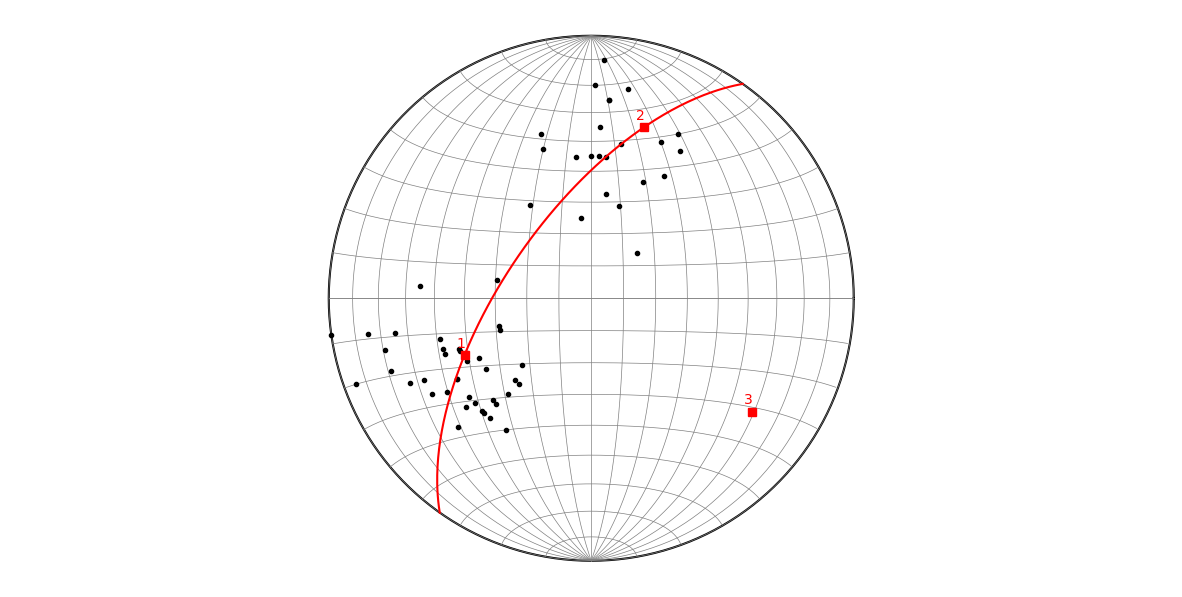

In [2]:
# Import libraries
import os
import numpy as np
import matplotlib.pyplot as plt
pi = np.pi

# Import functions 
from compgeo.pole import pole_from_plane
from compgeo.bingham import bingham


# Read the bedding data from the Big Elk anticline
beasd = np.loadtxt(os.path.abspath("data/ch6-1/beasd.txt"))

# Convert from degrees to radians
beasd = beasd*pi/180

# Initialize poles
T = np.zeros(len(beasd))
P = np.zeros(len(beasd))

# Compute poles to bedding
for i in range(len(T)):
     T[i],P[i] = pole_from_plane(beasd[i,0],beasd[i,1])

# Compute cylindrical best fit
# and plot in equal area stereonet
eigvec,confcone,bestfit, fig, ax = bingham(T,P,1)

# Convert from radians to degrees
eigvec = eigvec * 180/pi
confcone = confcone * 180/pi
bestfit = bestfit * 180/pi

# Print best-fit fold axis
print("Best-fit fold axis: trend = {:.1f}, plunge = {:.1f}"
      .format(eigvec[2,1],eigvec[2,2]))

# Print best-fit plane 
print("Best-fit plane: strike = {:.1f}, dip = {:.1f}\n"
      .format(bestfit[0],bestfit[1]))

# Print confidence cone
print("95% elliptical confidence cones:")
print("Around axis 1: Max = {:.1f}, Min = {:.1f}"
      .format(confcone[0,0],confcone[0,1]))
print("Around axis 3: Max = {:.1f}, Min = {:.1f}"
      .format(confcone[1,0],confcone[1,1]))

(ch06-5-2)=
### Line distributions

The orientation tensor $\mathbf{T}$ (Eq. {eq}`ch06_eq20`) is also useful for characterizing line distributions. {numref}`Figure %s <ch06_fig05>` shows three end-members of line distributions. The bipolar distribution ({numref}`Figure %s <ch06_fig05>`a) consists of a group of lines that are parallel or sub-parallel to each other and plunge in opposite directions, with some limited scatter. In this case, the lines define an elongate ellipsoid (a cigar), with a large (near 1.0) eigenvalue (long axis of the ellipsoid) and two small (near zero) eigenvalues (short axes of the ellipsoid). Also, the eigenvector of the largest eigenvalue describes well the preferred orientation of the lines ({numref}`Figure %s <ch06_fig05>`a). Notice that in this case, the mean vector calculation ([Section 4.4.1](ch04-4-1)) will fail since the lines plunging in opposite directions will cancel each other out.

```{figure} /figures/ch06_fig05.png
:width: 650px
:name: ch06_fig05

Three end members of line distributions. **a.** Bipolar, **b.** Girdle, and **c.** random. Each diagram has 30 lines. Modified from Allmendinger (2020a).
```

In the girdle distribution ({numref}`Figure %s <ch06_fig05>`b), all the lines are close to being coplanar, and they define a flattened ellipsoid (or pancake), with one small (near zero) eigenvalue corresponding to the pole of the best-fit plane through the lines, and two large relatively equal eigenvalues (near 0.5) whose eigenvectors lie within the best-fit plane. Finally, in the random distribution ({numref}`Figure %s <ch06_fig05>`c), the lines define a sphere and the eigenvalues are relatively equal. Thus, in general, the eigenvalues of $\mathbf{T}$ are a good way to characterize line distributions.

(ch06-5-1)=
### Best-fit plane

In [Section 4.4.3](ch04-4-3) we look at the problem of calculating the orientation of a plane from three points on the plane. But what if we have more than three points on the plane? We can use the least squares approach above to solve this problem (Allmendinger, 2020b). This will also allow us to evaluate the goodness of fit of the plane to the data points. Let’s assume the points are defined by position vectors $\mathbf{p}_{[i]}$ in an east-north-up (**ENU**) coordinate system. First, the centroid $\mathbf{c}$ of the position vectors $\mathbf{p}_{[i]}$ is calculated:

$$
\mathbf{c}=\frac{\sum_{i=1}^{n}\mathbf{p}_{[i]}}{n}
$$ (ch06_eq21)

Then, the centroid $\mathbf{c}$ is subtracted from the position vectors $\mathbf{p}_{[i]}$:

$$
\mathbf{s}_{[i]}=\mathbf{p}_{[i]}-\mathbf{c}
$$ (ch06_eq22)

And we use the vectors $\mathbf{s}_{[i]}$ to construct a covariance matrix $\mathbf{C}$ (which looks very similar to the orientation matrix $\mathbf{T}$):

$$
\mathbf{C}=\left[\begin{array}{ccc}\sum (s_E)_{[i]}^{2}  & \sum (s_E)_{[i]} (s_N)_{[i]} & \sum (s_E)_{[i]} (s_U)_{[i]} \\ \sum (s_N)_{[i]} (s_E)_{[i]} & \sum (s_N)_{[i]}^{2} & \sum (s_N)_{[i]} (s_U)_{[i]} \\ \sum (s_U)_{[i]} (s_E)_{[i]} & \sum (s_U)_{[i]} (s_N)_{[i]} & \sum (s_U)_{[i]}^{2}\end{array}\right]
$$ (ch06_eq23)

Finally, the eigenvalues and eigenvectors of the covariance matrix $\mathbf{C}$ are determined. The eigenvector corresponding to the smallest eigenvalue is the pole to the best-fit plane, and the square root of the smallest eigenvalue is the standard deviation of the distance of each point from the best-fit plane.

The function [fit_plane](https://github.com/nfcd/compGeo/blob/master/source/functions/fit_plane.py) calculates the best-fit plane to a group of lines:

In [3]:
import numpy as np

from compgeo.pole import plane_from_pole
from compgeo.cart_to_sph import cart_to_sph

def fit_plane(pts):
    """
    fit_plane computes the best-fit plane for a group of
    points (position vectors) on the plane
    
    USE: strike, dip, stdev = fit_plane(pts)
    
    pts is a n x 3 matrix containing the East (column 1),
    North (column 2), and Up (column 3) coordinates
    of n points on the plane
    
    strike and dip are returned in radians
    
    stdev is the standard deviation of the distance of
    each point from the best-fit plane
    """
    # Compute the centroid of the selected points
    avge = np.mean(pts[:,0])
    avgn = np.mean(pts[:,1])
    avgu = np.mean(pts[:,2])
    
    # Compute the points vectors minus the centroid
    pts[:,0] = pts[:,0] - avge
    pts[:,1] = pts[:,1] - avgn
    pts[:,2] = pts[:,2] - avgu
    
    # Compute the covariance/orientation matrix
    a = np.zeros((3,3))
    for i in range(pts.shape[0]):
        ce = pts[i,0]
        cn = pts[i,1]
        cu = pts[i,2]
        
        # compute orientation matrix
        a[0,0] = a[0,0] + ce*ce
        a[0,1] = a[0,1] + ce*cn
        a[0,2] = a[0,2] + ce*cu
        a[1,1] = a[1,1] + cn*cn
        a[1,2] = a[1,2] + cn*cu
        a[2,2] = a[2,2] + cu*cu
    
    # The orientation matrix is symmetric so the 
    # off-diagonal components are equal
    a[1,0] = a[0,1]
    a[2,0] = a[0,2]
    a[2,1] = a[1,2]
    
    # calculate the eigenvalues and eigenvectors of the
    # orientation matrix: use function eigh
    D, V = np.linalg.eigh(a)
    
    # Calculate pole to best-fit plane = lowest eigenvalue
    # vector in N, E, D coordinates
    cn = V[1,0]
    ce = V[0,0]
    cd = -V[2,0]
    
    # Find trend and plunge of pole to best fit plane
    trd, plg =cart_to_sph(cn,ce,cd)
    
    # Find Best fit plane
    strike, dip = plane_from_pole(trd,plg)
    
    # Calculate standard deviation = square root of
    # minimum eigenvalue
    stdev = np.sqrt(D[0])
    
    return strike, dip, stdev

Let’s use this function to compute the orientation of the contact between the Jurassic Js and Cretaceous Ke in the northeastern part of the Poker Peak Quadrangle, Idaho (Albee et al., 1975) (yellow contact in {numref}`Figure %s <ch06_fig06>`). The notebook [ch6-2](https://github.com/nfcd/compGeo/blob/master/source/notebooks/ch6-2.ipynb) shows the solution to this problem. Notice that the UTM **ENU** coordinates of the points on the Js-Ke contact are read from the file [jske.txt](https://github.com/nfcd/compGeo/blob/master/source/data/ch6-2/jske.txt):

<embed src="attachment:ch6f7.pdf" style="width:55.0%" />

```{figure} /figures/ch06_fig06.png
:width: 500px
:name: ch06_fig06

Northeastern portion of the Poker Peak Quadrangle, Idaho (Albee et al., 1975). The yellow dots are points on the JsKe contact.
```

In [4]:
# Import libraries
import numpy as np
pi = np.pi

# Import function fit_plane
from compgeo.fit_plane import fit_plane

# Read the points on the contact
# Coordinates are UTM (ENU) in meters
jske = np.loadtxt(os.path.abspath('data/ch6-2/jske.txt'))

# Compute best-fit plane
strike, dip, stdev = fit_plane(jske)

# Print strike and dip of plane
print('Strike = {:.1f}, Dip = {:.1f}'
      .format(strike*180/pi,dip*180/pi))

# Print standard deviation of the distance of each point
# from the best-fit plane
print('Standard deviation = {:.1f} m'.format(stdev))

Strike = 153.3, Dip = 29.9
Standard deviation = 246.8 m


This orientation is not far from the strikes and dips close to the Js-Ke contact in {numref}`Figure %s <ch06_fig06>`. To learn more about fitting a plane to a distribution of lines, you can read Fernandez (2005).

(ch06-6)=
## Exercises

1. The file [csdtp.txt](https://github.com/nfcd/compGeo/blob/master/source/data/ch6-exercise1/csdtp.txt) contains the strikes and dips (RHR) of the Jurassic Sundance Formation around the Sheep Mountain Anticline, Wyoming ({numref}`Figure %s <ch05_fig08>`). You can visualize these bedding orientations in Google Earth using the file [csdtp.kml](https://github.com/nfcd/compGeo/blob/master/source/data/ch6-exercise1/csdtp.kml). Compute the anticline’s best-fit fold axis using the function `bingham`.

2. The file [biaxial.txt](https://github.com/nfcd/compGeo/blob/master/source/data/ch6-exercise2/biaxial.txt), [girdle.txt](https://github.com/nfcd/compGeo/blob/master/source/data/ch6-exercise2/girdle.txt), and [random.txt](https://github.com/nfcd/compGeo/blob/master/source/data/ch6-exercise2/random.txt) contain the lines (trend and plunge) of the distributions shown in {numref}`Figure %s <ch06_fig05>`. Compute the eigenvalues and eigenvectors, and the 95$\%$ confidence cones of these line distributions using the function `bingham`.

3. Trede et al. (2019) published an interesting article about the appropriate sample size for strike and dip measurements. {numref}`Figure %s <ch06_fig07>` shows the Lidar scan of one of their test surfaces, a two meters-size foliation in Cambro-Ordovician mica schists of the Svarthola Cave, SW Norway. The file [fol.txt](https://github.com/nfcd/compGeo/blob/master/source/data/ch6-exercise3/fol.txt) contains the **ENU** coordinates of the scanned points (grey points, {numref}`Figure %s <ch06_fig07>`), and the file [kfol.txt](https://github.com/nfcd/compGeo/blob/master/source/data/ch6-exercise3/kfol.txt) contains the **ENU** coordinates of regularly spaced points on the foliation (red circles, {numref}`Figure %s <ch06_fig07>`).

    ```{figure} /figures/ch06_fig07.png
    :width: 600px
    :name: ch06_fig07

    Two-meters size foliation plane in Cambro-Ordovician mica schists of the Svarthole Cave, SW Norway. The grey points are Lidar scanned points on the foliation. The red circles are points on a regular grid covering the foliation. The Lidar scan frequency is 300 kHz, and vertical and horizontal point spacing are 0.013 and 0.022 m, respectively. From Trede et al. (2019).
    ```

    1. On each of the points of the regularly spaced grid (red points, {numref}`Figure %s <ch06_fig07>`), compute the strike and dip of the foliation using the Lidar scanned points (grey points, {numref}`Figure %s <ch06_fig07>`) within a radius $r$ of 0.1 m from the grid point. Do this only if there are more than 3 points within the radius $r$.

    2. Repeat the procedure in (a) for larger radii $r$ of 0.3, 0.5, 0.7 and 0.9 m.

    3. Plot histograms of the strike, and of the dip, for each value of  $r$. Vertically stack the histograms starting with $r$ = 0.1 at the base. Use different colors to denote the different $r$  values (see Fig. 8 of Trede et al., 2019).

    4. At what radius $r$, does the orientation of the foliation stabilize? What is the best sample size to measure the foliation?

    :::{hint}
	Use function `fit_plane`.
	:::

(ch06-7)=
## References

Albee, H.F. and Cullins, H.L. 1975. Geologic Map of the Poker Peak
Quadrangle, Bonneville County, Idaho. U.S. Geological Survey, Geologic
Quadrangle Map GQ 1260.

Allmendinger, R.W., Cardozo, N. and Fisher, D.M. 2012. Structural
Geology Algorithms: Vectors and Tensors. Cambridge University Press.

Allmendinger, R.W. 2020a. Modern Structural Practice: A structural
geology laboratory manual for the 21st century.
\[[Online](https://www.rickallmendinger.net/download)\]. \[Accessed
March, 2021\].

Allmendinger, R.W., 2020b. GMDE: Extracting quantitative information
from geologic maps. Geosphere 16, X, 1– 13.

Charlesworth, H.A.K., Langenberg, C.W. and Ramsden, J. 1976. Determining
axes, axial planes, and sections of macroscopic folds using
computer-based methods. Canadian Journal of Earth Science 13, 54-65.

Fernandez, O. 2005. Obtaining a best fitting plane through 3D
georeferenced data. Journal of Structural Geology 27, 855–858.

Fisher, N.I., Lewis, T. and Embleton, B.J.J. 1987. Statistical analysis
of spherical data. Cambridge University Press.

Trede, C., Cardozo, N. and Watson, L. 2019. What is the appropriate
sample size for strike and dip measurements? An evaluation from compass,
smartphone and LIDAR measurements. Norwegian Journal of Geology 99,
1-14.